In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import random
import math
%matplotlib inline 

In [2]:
num_friends = [random.randint(0,100) for r in range(1000)]
daily_minutes = [random.randint(0,120) for r in range(1000)]

In [32]:
names = df = pd.read_csv("ga_baby_names.csv")
name_list = list(names.sample(1000).Name)
print(name_list)

['Henri', 'Kimari', 'Deonte', 'Catherine', 'Kaden', 'Edwin', 'Larry', 'Jacqueline', 'Leo', 'Jalisa', 'Enya', 'Karon', 'Yahaira', 'Teena', 'Myra', 'Briley', 'Knox', 'Pierce', 'Vincent', 'Mario', 'Astrid', 'Rayna', 'Lillie', 'Latisha', 'Prince', 'Yamileth', 'Sharion', 'Deidra', 'Wesley', 'Madden', 'Ronny', 'Jordan', 'Sam', 'Jean', 'Alfred', 'Tanisha', 'Cherry', 'Shirley', 'Alonzo', 'Alexander', 'Sonny', 'Shania', 'Lucky', 'Ambrose', 'Estefania', 'Amayah', 'Mavis', 'Katie', 'Trina', 'Yaretzi', 'Navya', 'Sidney', 'Kendarius', 'Tamiya', 'Ebony', 'Julia', 'Lula', 'Brooklynn', 'Felix', 'John', 'Hugh', 'Flora', 'Madilynn', 'Williams', 'Glenn', 'Rodrigo', 'Stephanie', 'Liberty', 'Fletcher', 'Ahmad', 'Catherine', 'Phillip', 'Marin', 'Jeffrey', 'Gabriel', 'Ezekiel', 'Lonnie', 'Millie', 'Christian', 'Karon', 'Sierra', 'Lucretia', 'Dawn', 'Reggie', 'Joey', 'Felix', 'Henry', 'Thomas', 'Micaela', 'Cari', 'Everlena', 'Hunter', 'Ansley', 'Keily', 'Destinee', 'Carey', 'Zariah', 'Evangeline', 'Tabatha', 

In [35]:
df = pd.DataFrame(data = list(zip(name_list,num_friends,daily_minutes)), columns=['Names', 'Friends', 'Minutes'])
df.head(10)

,Names,Friends,Minutes
0,Henri,35,30
1,Kimari,5,16
2,Deonte,9,0
3,Catherine,51,34
4,Kaden,30,96
5,Edwin,63,81
6,Larry,57,100
7,Jacqueline,76,78
8,Leo,40,17
9,Jalisa,24,51


### Plotting From the Book

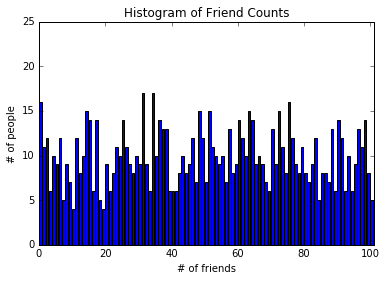

In [3]:
friend_counts = collections.Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

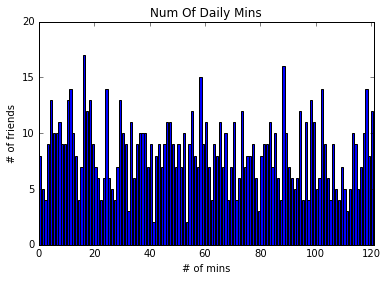

In [4]:
friend_counts = collections.Counter(daily_minutes)
xs = range(121) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 121, 0, 20])
plt.title("Num Of Daily Mins")
plt.xlabel("# of mins")
plt.ylabel("# of friends")
plt.show()

### Plotting using Pandas

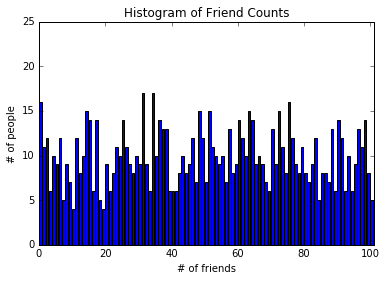

In [36]:
friend_counts = collections.Counter(df.Friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

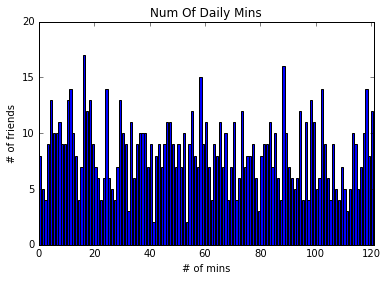

In [37]:
friend_counts = collections.Counter(df.Minutes)
xs = range(121) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 121, 0, 20])
plt.title("Num Of Daily Mins")
plt.xlabel("# of mins")
plt.ylabel("# of friends")
plt.show()

### Statistics from the book

In [5]:
num_points = len(num_friends)
print(num_points)

1000


In [6]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
print(largest_value)
print(smallest_value)

100
0


In [7]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]
print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

0
0
100


In [8]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
print(median(num_friends))

51.0


In [9]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

10
26
74
90


In [10]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = collections.Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]
       
print(mode(num_friends))

[31, 34]


In [11]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

print(data_range(num_friends))

100


In [12]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
            for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = sum(x)/len(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

print(variance(num_friends))

826.8627627627629


In [13]:
def standard_deviation(x):
    return math.sqrt(variance(x))

print(standard_deviation(num_friends))

28.755221486936296


In [14]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print(interquartile_range(num_friends))

48


In [15]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

print(covariance(num_friends, daily_minutes))

15.099159159159157


In [16]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
print(correlation(num_friends, daily_minutes))

0.014923387938226094


In [20]:
outlier = num_friends.index(100) # index of outlier
num_friends_good = [x
                for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                for i, x in enumerate(daily_minutes)
                    if i != outlier]

print(correlation(num_friends_good, daily_minutes_good)) # 0.57

0.014411930122820832


### Statistics using Pandas

In [39]:
num_points = len(df)
print(num_points)

1000


In [40]:
largest_value = max(df.Friends)
smallest_value = min(df.Friends)
print(largest_value)
print(smallest_value)

100
0


In [61]:
df_sorted = df.sort_values(['Friends',"Minutes","Names"], ascending=[True,True,True])
df_sorted.head(10)

,Names,Friends,Minutes
47,Katie,0,4
391,Roy,0,6
489,Walker,0,13
398,Janet,0,20
388,Natasha,0,28
998,Levi,0,29
322,Simon,0,30
208,Bennie,0,44
492,Jalyn,0,45
442,Lee,0,58


In [71]:
df_sorted.tail(10)

,Names,Friends,Minutes
33,Jean,99,37
457,Lonnie,99,47
145,Gabriele,99,66
774,Jessa,99,80
222,Avery,99,101
495,Rashida,100,42
678,Ezequiel,100,52
123,Lisa,100,69
818,Markita,100,86
719,Louise,100,103


In [72]:
smallest_value = df_sorted.iloc[0]
second_smallest_value = df_sorted.iloc[1]
second_largest_value = df_sorted.iloc[-2]
print(smallest_value.Names,smallest_value.Friends)
print(second_smallest_value.Names,second_smallest_value.Friends)
print(second_largest_value.Names,second_largest_value.Friends)

Katie 0
Roy 0
Markita 100


In [78]:
print(df.median())
print()
print(df.Friends.median(),
      df.Minutes.median())

Friends    51.0
Minutes    58.0
dtype: float64

51.0 58.0


In [82]:
print(df.quantile(.1))
print()
print(df.quantile(.25))
print()
print(df.quantile(.75))
print()
print(df.quantile(.9))

Friends    10.0
Minutes    10.0
dtype: float64

Friends    26.0
Minutes    28.0
dtype: float64

Friends    74.0
Minutes    88.0
dtype: float64

Friends     90.0
Minutes    107.0
dtype: float64


In [83]:
print(df.mode())

       Names  Friends  Minutes
0  Catherine     31.0     16.0
1     Deidra     34.0      NaN
2        Lee      NaN      NaN
3     Lonnie      NaN      NaN
4    Shirley      NaN      NaN


In [84]:
def dataframe_range(val):
    return val.Friends.max() - val.Friends.min()

print(dataframe_range(df))

100


In [85]:
print(df.var())

Friends     826.862763
Minutes    1238.047291
dtype: float64


In [86]:
print(df.std())

Friends    28.755221
Minutes    35.185896
dtype: float64


In [87]:
def dataframe_iqr(val):
    return val.quantile(.75)-val.quantile(.25)

print(dataframe_iqr(df))

Friends    48.0
Minutes    60.0
dtype: float64


In [88]:
print(df.cov())

            Friends      Minutes
Friends  826.862763    15.099159
Minutes   15.099159  1238.047291


In [90]:
print(df.corr())

          Friends   Minutes
Friends  1.000000  0.014923
Minutes  0.014923  1.000000


In [91]:
df.tail()

,Names,Friends,Minutes
995,Ginger,34,42
996,Addie,31,7
997,Miranda,72,41
998,Levi,0,29
999,Itzel,20,103


In [96]:
df_smaller = df.drop(df.index[[-1]])
df_smaller.tail()

,Names,Friends,Minutes
994,Derrick,74,47
995,Ginger,34,42
996,Addie,31,7
997,Miranda,72,41
998,Levi,0,29


In [97]:
print(df.corr())

          Friends   Minutes
Friends  1.000000  0.014923
Minutes  0.014923  1.000000
